In [1]:
import json
from datetime import datetime
from pathlib import Path

import numpy as np

from trial import Trial, load_trials
from utils import SetUpstreamSteererAtStep


# Notebook for Shift with Chenran

Shift on  28 and 29 September 2022 for testing Bayesian Optimisation (BO) against Reinforcement Learning (RL).

Once we know BO is working in the machine, the plan is to test BO and RL in pairs on the same problems (targets) and compare their performance in the real world.

In [2]:
# Define target (and thresholds) ... max steps is chosen seperately for each algorithm
# comment = "test"

# target_mu_x = 0.0
# target_sigma_x = 0.0
# target_mu_y = 0.0
# target_sigma_y = 0.0

# target_mu_x_threshold = 3.3198e-6
# target_mu_y_threshold = 3.3198e-6
# target_sigma_x_threshold = 3.3198e-6
# target_sigma_y_threshold = 3.3198e-6


In [3]:
# # Load problem
trial_index = 33

trials = load_trials(Path("trials.yaml"))

comment = f"trial_{trial_index:03d}"

# Note that the indicies are still according to the old order mu_x, mu_y, sigma_x, sigma_y
target_mu_x = trials[trial_index].target_beam[0]
target_sigma_x = trials[trial_index].target_beam[1]
target_mu_y = trials[trial_index].target_beam[2]
target_sigma_y = trials[trial_index].target_beam[3]
target_mu_x_threshold = 3.3198e-9
target_mu_y_threshold = 3.3198e-9
target_sigma_x_threshold = 3.3198e-9
target_sigma_y_threshold = 3.3198e-9


In [4]:
from backend import DOOCSBackend
from environment import EATransverseTuning

env = EATransverseTuning(
    backend=DOOCSBackend(), magnet_init_mode="constant", magnet_init_values=np.zeros(5)
)
env.reset()


math_op.py: module Numba is not installed. Install it if you want speed up correlation calculations


[INFO    ] : : beam.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] : : : : : : : : high_order.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation
[INFO    ] wake3D.py: module NUMBA is not installed. Install it to speed up calculation


initializing ocelot...
import: module NUMBA is not installed. Install it to speed up calculation
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


{'beam': array([-0.00072396,  0.00174803, -0.00020502,  0.00030152], dtype=float32),
 'magnets': array([0., 0., 0., 0., 0.], dtype=float32),
 'target': array([-1.2289018e-03,  1.8447555e-03,  4.9349992e-04,  2.7805021e-05],
       dtype=float32)}

11it [01:09,  6.27s/it]                        


title = 'Beam Optimisation on AREABSCR1 using Bayesian Optimisation'
msg = 'Bayesian Optimisation optimised beam on AREABSCR1\n\nAgent: Bayesian Optimisation\nStart time: 2023-01-31 16:54:42.394625\nTime taken: 0:01:09.000726\nNo. of steps: 11\n\nBeam before:\n    mu_x    = -0.7736 mm\n    sigma_x =  1.8023 mm\n    mu_y    =  0.0200 mm\n    sigma_y =  0.3907 mm\n\nBeam after:\n    mu_x    = -0.0639 mm\n    sigma_x =  0.2833 mm\n    mu_y    = -1.1901 mm\n    sigma_y =  0.2208 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  1.0346 mm\n    |delta_sigma_x| =  0.0554 mm\n    |delta_mu_y|    =  0.7232 mm\n    |delta_sigma_y| =  0.0241 mm\n\n    MAE =  0.4593 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.3112 1/m^2\n    AREAMQZM2 strength = -16.2979 1/m^2\n    AREAMCVM1 kick     =  -1.

/usr/bin/lp: No such file or directory


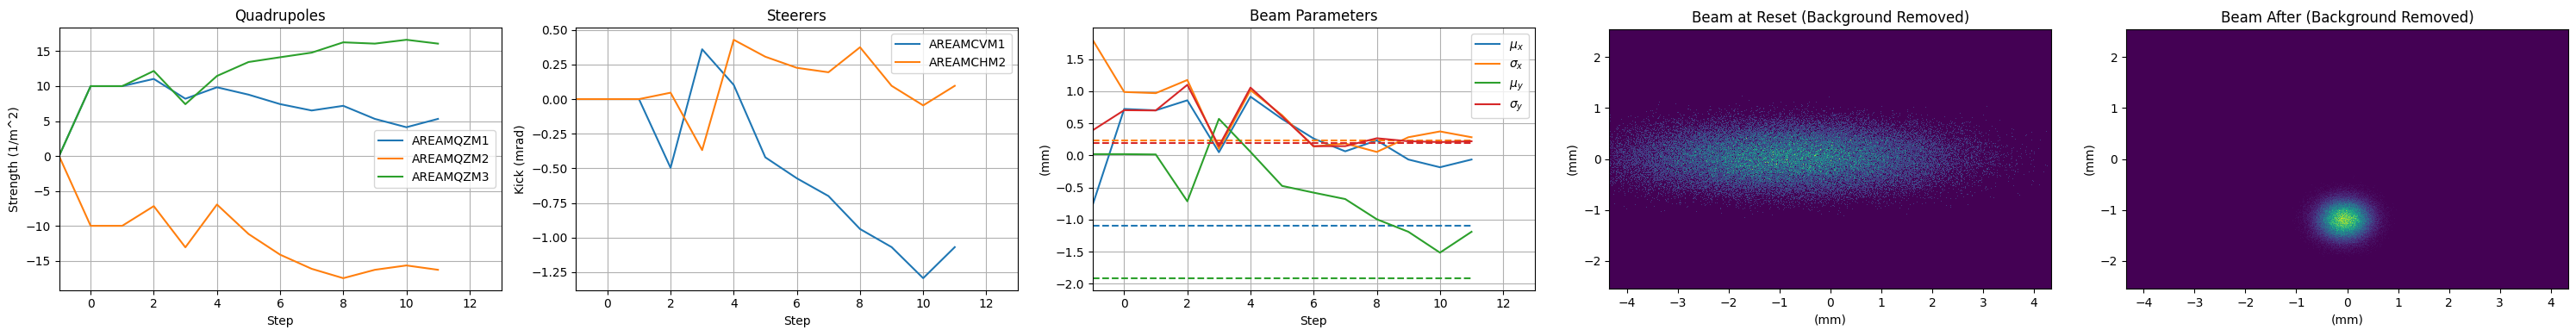

In [5]:
# Bayesian Optimisation
from ea_bo import optimize

optimize(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="Bayesian Optimisation",
    logbook=True,
    # data_log_dir=f"data/bo_vs_rl/real/bo/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
    acquisition="EI",
    init_samples=5,
    filter_action=None,
    magnet_init_values=np.array([10, -10, 0, 10, 0]),
)


In [4]:
from backend import DOOCSBackend
from environment import EATransverseTuning

env = EATransverseTuning(
    backend=DOOCSBackend(), magnet_init_mode="constant", magnet_init_values=np.zeros(5)
)
env.reset()


math_op.py: module Numba is not installed. Install it if you want speed up correlation calculations


[INFO    ] : : beam.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] : : : : : : : : high_order.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] radiation_py.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module NUMBA is not installed. Install it to speed up calculation
[INFO    ] csr.py: module PYFFTW is not installed. Install it to speed up calculation.
[INFO    ] csr.py: module NUMEXPR is not installed. Install it to speed up calculation
[INFO    ] wake3D.py: module NUMBA is not installed. Install it to speed up calculation


initializing ocelot...
import: module NUMBA is not installed. Install it to speed up calculation
import: module PYFFTW is not installed. Install it to speed up calculation
import: module NUMEXPR is not installed. Install it to speed up calculation


{'beam': array([-0.00014905,  0.00066907, -0.00059007,  0.00129952], dtype=float32),
 'magnets': array([0., 0., 0., 0., 0.], dtype=float32),
 'target': array([-4.9986190e-04,  1.6353596e-03,  1.4559098e-04,  9.0139380e-05],
       dtype=float32)}

 10%|█         | 1/10 [00:06<00:56,  6.25s/it]

current_beam = array([-0.00066008,  0.00013864, -0.00039505,  0.00048838])
beam_reward = 0.001776543790799538
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 20%|██        | 2/10 [00:12<00:49,  6.22s/it]

current_beam = array([-8.87200000e-04,  3.91799575e-04, -5.70068400e-04,  8.49358811e-05])
beam_reward = 0.0005073436262223812
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 30%|███       | 3/10 [00:18<00:43,  6.21s/it]

current_beam = array([-0.00105754,  0.00019891, -0.00092011,  0.00017837])
beam_reward = 0.0007487455487613221
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 40%|████      | 4/10 [00:24<00:37,  6.20s/it]

current_beam = array([-0.00103625,  0.00025316, -0.00131016,  0.00025481])
beam_reward = 0.0003327490490787539
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 50%|█████     | 5/10 [00:31<00:30,  6.19s/it]

current_beam = array([-0.00109303,  0.00026522, -0.00173021,  0.00028029])
beam_reward = 0.0004392950641188961
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 60%|██████    | 6/10 [00:37<00:24,  6.18s/it]

current_beam = array([-0.00110723,  0.00027727, -0.00195523,  0.00026755])
beam_reward = 0.00013851300232713723
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 70%|███████   | 7/10 [00:43<00:18,  6.18s/it]

current_beam = array([-0.00108593,  0.00027125, -0.00192523,  0.00027604])
beam_reward = 2.381324624271033e-05
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 80%|████████  | 8/10 [00:49<00:12,  6.19s/it]

current_beam = array([-0.00109303,  0.00028933, -0.00193023,  0.00023782])
beam_reward = 2.22350891719745e-05
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


 90%|█████████ | 9/10 [00:55<00:06,  6.19s/it]

current_beam = array([-0.00110013,  0.00024714, -0.00191523,  0.00025056])
beam_reward = 4.8179669680856315e-05
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


100%|██████████| 10/10 [01:01<00:00,  6.20s/it]

current_beam = array([-0.00109303,  0.00025316, -0.00193523,  0.00019111])
beam_reward = 1.844909511176414e-05
self.initial_screen_beam = array([-0.00044005,  0.00037372, -0.00030504,  0.00189832])
initial_distance = 0.004114086518662408


title = 'Beam Optimisation on AREABSCR1 using Reinforcement Learning'
msg = 'Reinforcement Learning agent optimised beam on AREABSCR1\n\nAgent: polished-donkey-996\nStart time: 2023-01-31 17:04:40.884112\nTime taken: 0:01:01.990799\nNo. of steps: 10\n\nBeam before:\n    mu_x    = -0.1349 mm\n    sigma_x =  0.6691 mm\n    mu_y    = -0.5701 mm\n    sigma_y =  1.2571 mm\n\nBeam after:\n    mu_x    = -1.0930 mm\n    sigma_x =  0.2532 mm\n    mu_y    = -1.9352 mm\n    sigma_y =  0.1911 mm\n\nTarget beam:\n    mu_x    = -1.0984 mm    (e = 0.0000 mm) :/\n    sigma_x =  0.2279 mm    (e = 0.0000 mm) :/\n    mu_y    = -1.9133 mm    (e = 0.0000 mm) :/\n    sigma_y =  0.1967 mm    (e = 0.0000 mm) :/\n\nResult:\n    |delta_mu_x|    =  0.0054 mm\n    |delta_sigma_x| =  0.0253 mm\n    |delta_mu_y|    =  0.0219 mm\n    |delta_sigma_y| =  0.0056 mm\n\n    MAE =  0.0146 mm\n\nFinal magnet settings:\n    AREAMQZM1 strength =   5.4241 1/m^2\n    AREAMQZM2 strength = -14.1903 1/m^2\n    AREAMCVM1 kick     

/usr/bin/lp: No such file or directory


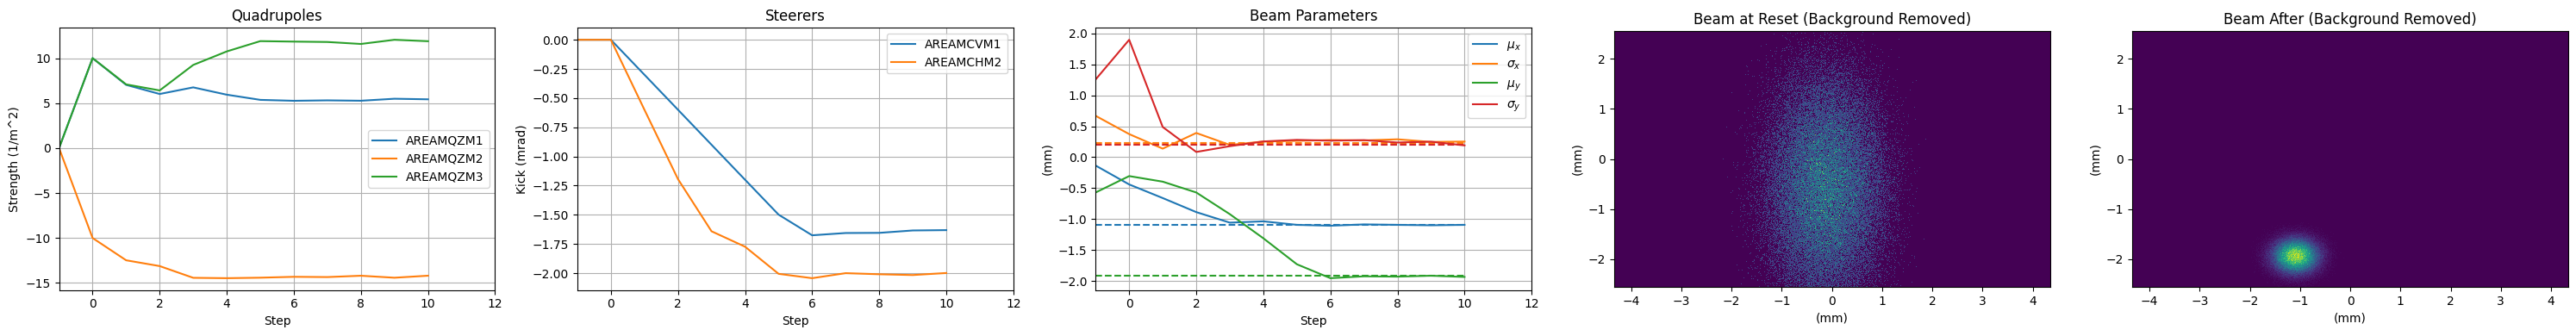

In [5]:
# Reinforcement Learning
from ea_optimize import optimize_donkey

optimize_donkey(
    target_mu_x=target_mu_x,
    target_sigma_x=target_sigma_x,
    target_mu_y=target_mu_y,
    target_sigma_y=target_sigma_y,
    target_mu_x_threshold=target_mu_x_threshold,
    target_mu_y_threshold=target_mu_y_threshold,
    target_sigma_x_threshold=target_sigma_x_threshold,
    target_sigma_y_threshold=target_sigma_y_threshold,
    max_steps=10,
    model_name="polished-donkey-996",
    logbook=True,
    # data_log_dir=f"data/bo_vs_rl/real/rl/{datetime.now():%Y%m%d%H%M}_{comment}",
    progress_bar=True,
    callback=None,
)


In [8]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [9]:
# # Bayesian Optimisation
# from ea_bo import optimize

# optimize(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=75,
#     model_name="Bayesian Optimisation",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/bo_ucb/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     init_x=None,
#     init_samples=5,
#     filter_action=None,
#     magnet_init_values=np.array([10, -10, 0, 10, 0]),
# )


In [10]:
# from ea_optimize import ARESEADOOCS

# env = ARESEADOOCS(magnet_init_mode="constant", magnet_init_values=np.zeros(5))
# env.reset()


In [11]:
# Reinforcement Learning with BO takeover
# from ea_rlbo import optimize_donkey_bo_combo

# bo_takeover = 0.00015

# optimize_donkey_bo_combo(
#     target_mu_x=target_mu_x,
#     target_sigma_x=target_sigma_x,
#     target_mu_y=target_mu_y,
#     target_sigma_y=target_sigma_y,
#     target_mu_x_threshold=target_mu_x_threshold,
#     target_mu_y_threshold=target_mu_y_threshold,
#     target_sigma_x_threshold=target_sigma_x_threshold,
#     target_sigma_y_threshold=target_sigma_y_threshold,
#     max_steps=50,
#     model_name="polished-donkey-996",
#     logbook=True,
#     data_log_dir=f"data/bo_vs_rl/real/rl_bo_takeover_{bo_takeover}/{datetime.now():%Y%m%d%H%M}_{comment}",
#     progress_bar=True,
#     callback=None,
#     acquisition="UCB",
#     rl_steps=10,
#     bo_takeover=bo_takeover,
#     beta=0.01,
#     stepsize=0.05,
# )
